# Prediction of cab booking

In [ ]:
# importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')

# [A] Training the model

In [ ]:
# Reading the train dataset & train_label. Merging the train_label with train dataset

In [ ]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('train_label.csv',header=None,names=['Total_booking'])
df['Total_booking']=df1['Total_booking']

In [ ]:
# Reading the test dataset

In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [ ]:
# checking the data types of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [ ]:
# knowing the unique values in object data types

In [ ]:
print(df['season'].unique())
print(df['weather'].unique())

['Summer' 'Fall' 'Spring' 'Winter']
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']


# Missing or null value analysis

In [ ]:
# Missing values: No null values in the dataset

In [ ]:
df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [ ]:
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [ ]:
# converting 'datetime' datatype from string to datetime for extracting hours,month,weekday information

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df_test['datetime']=pd.to_datetime(df_test['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 680.4+ KB


In [ ]:
# making individual columns for hours,month,weekday from datetime column

In [ ]:
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.day_name()

In [ ]:
df_test['month']=df_test['datetime'].dt.month
df_test['hour']=df_test['datetime'].dt.hour
df_test['weekday']=df_test['datetime'].dt.day_name()

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,month,hour,weekday
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5,19,Wednesday
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9,4,Wednesday
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1,9,Thursday
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11,16,Friday
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9,13,Tuesday


# Visualizing data using different visualizations 

In [ ]:
# histogram of features:
# 'windspeed' is right skewed (i.e it has outliers)
# 'temp','humidity',atemp' --> no skewness in data

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'atemp'}>]], dtype=object)

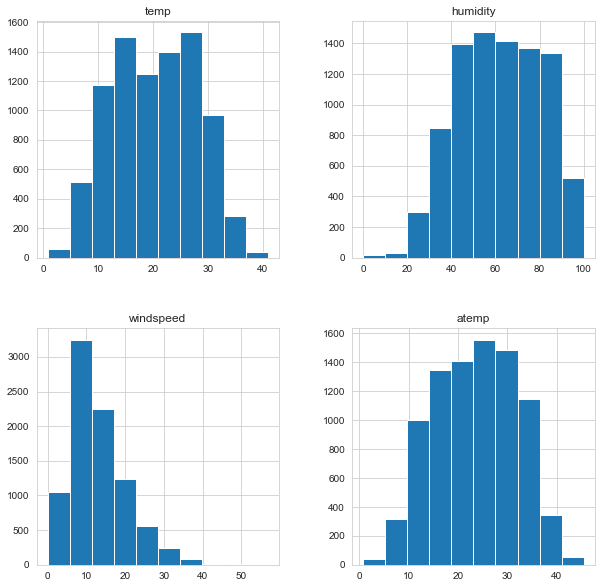

In [ ]:
df[['temp','humidity','windspeed','atemp']].hist(figsize=(10,10))

In [ ]:
# After 27 deg. temperature, as temp. increasing the humidity is reducing

<AxesSubplot:xlabel='temp', ylabel='humidity'>

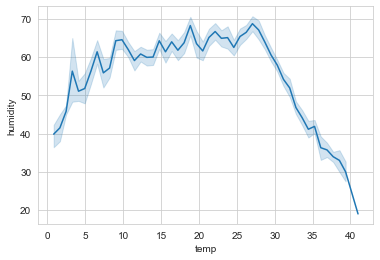

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x='temp',y='humidity',data=df)

In [ ]:
# if windspeed changes also, temperature is constant at different seasons

<AxesSubplot:xlabel='windspeed', ylabel='temp'>

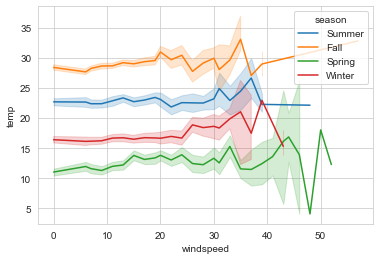

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x='windspeed',y='temp',data=df,hue='season')

In [ ]:
# all seasons (summer, fall, winter) except spring, no. of bookings are around 200(approx.)

<AxesSubplot:xlabel='season', ylabel='Total_booking'>

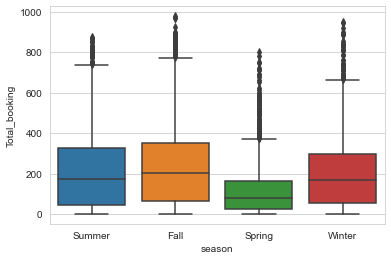

In [ ]:
sns.boxplot(x ='season', y ='Total_booking', data = df)

In [ ]:
# plot btw weather & total_booking under different seasons

<AxesSubplot:xlabel='weather', ylabel='Total_booking'>

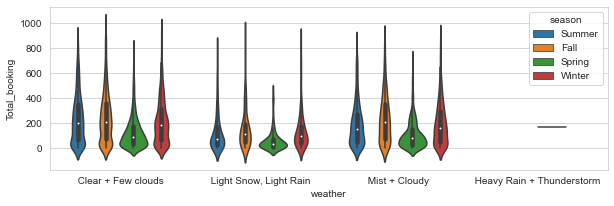

In [ ]:
plt.figure(figsize=(10,3))
sns.violinplot(x ='weather', y ='Total_booking', data = df, hue ='season')

In [ ]:
# this plot shows-->under each season, which weather condition having how many max.no. of hours 

<AxesSubplot:xlabel='season', ylabel='hour'>

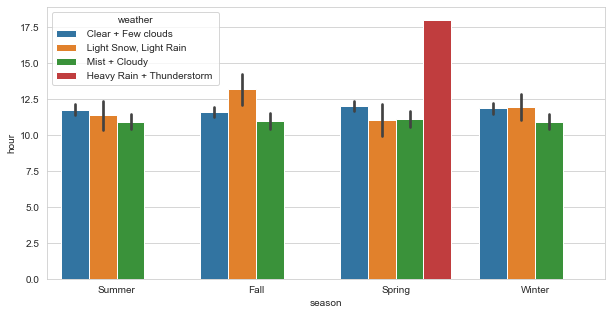

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='season',y='hour',data=df,hue='weather')

In [ ]:
# this plot shows --> temp. at each hour during different seasons

<AxesSubplot:xlabel='hour', ylabel='temp'>

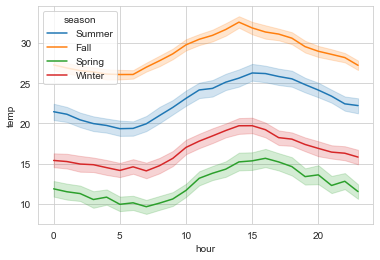

In [ ]:
sns.lineplot(x='hour',y='temp',data=df,hue='season')

In [ ]:
# plot explain windspeed at each month

<AxesSubplot:xlabel='month', ylabel='windspeed'>

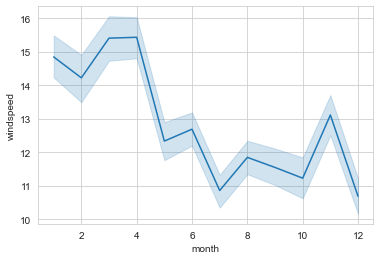

In [ ]:
sns.lineplot(x='month',y='windspeed',data=df)

In [ ]:
# this plot shows humidity at each month during different weather conditions

<AxesSubplot:xlabel='month', ylabel='humidity'>

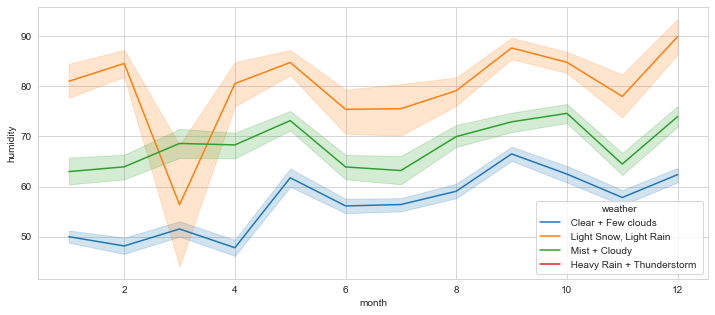

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='humidity',data=df,hue='weather')

# Outlier analysis

In [ ]:
# temp,atemp, humidity has no outliers

<AxesSubplot:xlabel='temp'>

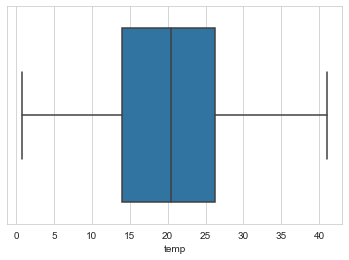

In [ ]:
sns.boxplot(df['temp'])

<AxesSubplot:xlabel='atemp'>

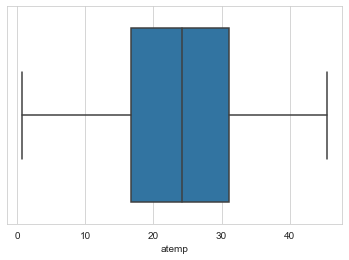

In [ ]:
sns.boxplot(df['atemp'])

<AxesSubplot:xlabel='humidity'>

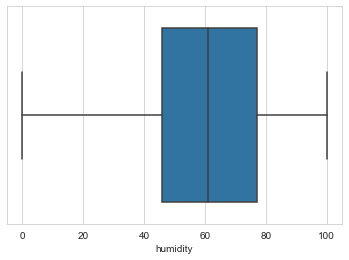

In [ ]:
sns.boxplot(df['humidity'])

In [ ]:
# windspeed has outliers

<AxesSubplot:xlabel='windspeed'>

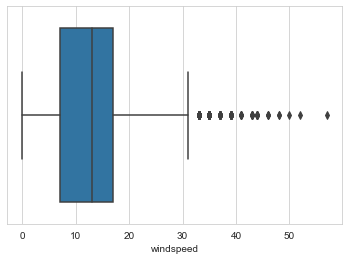

In [ ]:
sns.boxplot(df['windspeed'])

In [ ]:
# removing of outliers of windspeed using IQR

In [ ]:
q1=df['windspeed'].quantile(0.25)
q2=df['windspeed'].quantile(0.75)
iqr=q2-q1
whisker1=q1-1.5*iqr
whisker2=q2+1.5*iqr
df=df[(df['windspeed']>whisker1) & (df['windspeed']<whisker2)]

In [ ]:
# no outlier in windspeed after outlier analysis

<AxesSubplot:xlabel='windspeed'>

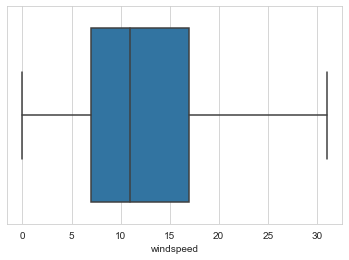

In [ ]:
sns.boxplot(df['windspeed'])

# Visualizing Total_booking Vs other features to generate insights

In [ ]:
# On 'Fall' cab bookings are more compared to other seasons
# On 'Spring' cab bookings are less compared to other seasons

<AxesSubplot:xlabel='season', ylabel='Total_booking'>

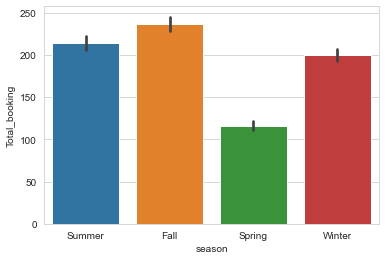

In [ ]:
sns.barplot(x='season',y='Total_booking',data=df)

In [ ]:
# cab bookings are same wheather it is a holiday or not

<AxesSubplot:xlabel='holiday', ylabel='Total_booking'>

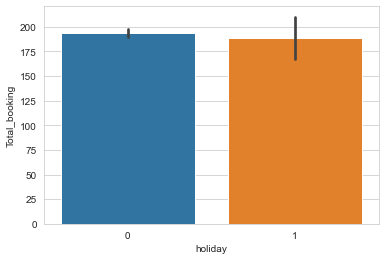

In [ ]:
sns.barplot(x='holiday',y='Total_booking',data=df)

In [ ]:
#  cab bookings are same wheather it is a working day or not

<AxesSubplot:xlabel='workingday', ylabel='Total_booking'>

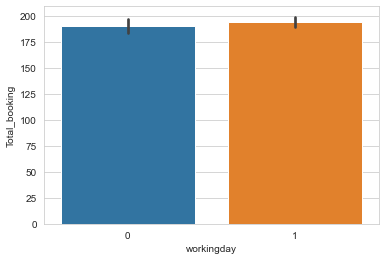

In [ ]:
sns.barplot(x='workingday',y='Total_booking',data=df)

In [ ]:
# On 'Clear + Few clouds' cab bookings are more compared to other weather
# On 'Light Snow, Light Rain' cab bookings are less compared to other weather

<AxesSubplot:xlabel='weather', ylabel='Total_booking'>

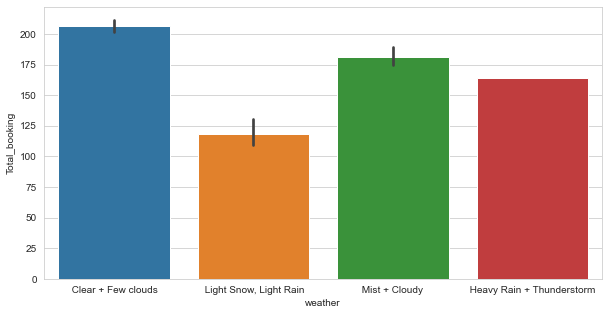

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='weather',y='Total_booking',data=df)

In [ ]:
# temp/atemp vs total_booking plot looks more or less like a linear plot.
# that means as temperature increase,the no. of bookings increasing

<AxesSubplot:xlabel='temp', ylabel='Total_booking'>

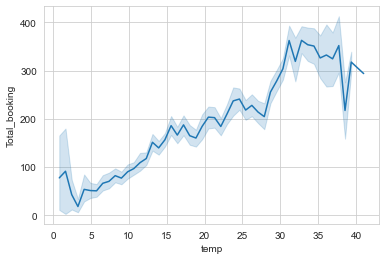

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x='temp',y='Total_booking',data=df)

<AxesSubplot:xlabel='atemp', ylabel='Total_booking'>

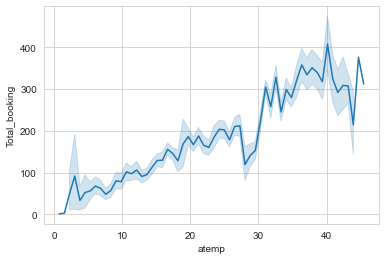

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x='atemp',y='Total_booking',data=df)

In [ ]:
# plot with -ive slope --> that means as humidity increases,the total bookings are reducing

<AxesSubplot:xlabel='humidity', ylabel='Total_booking'>

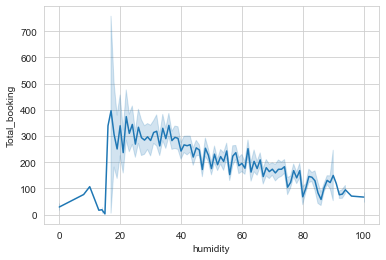

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(x='humidity',y='Total_booking',data=df)

In [ ]:
# in the month of january & february booking are less compared to other months

<AxesSubplot:xlabel='month', ylabel='Total_booking'>

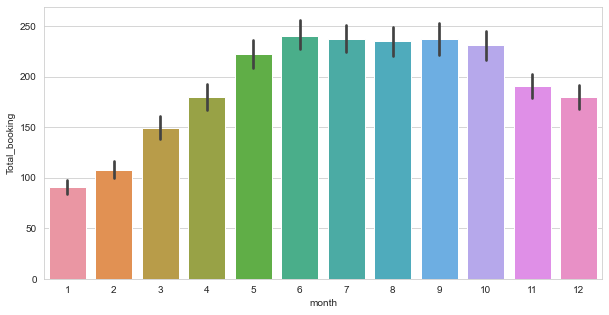

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='Total_booking',data=df)

In [ ]:
# evening times booking are more

<AxesSubplot:xlabel='hour', ylabel='Total_booking'>

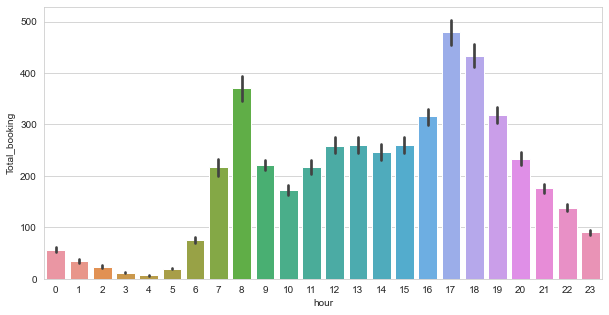

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='hour',y='Total_booking',data=df)

In [ ]:
#   cab bookings are more or less equal irrespective of a day

<AxesSubplot:xlabel='weekday', ylabel='Total_booking'>

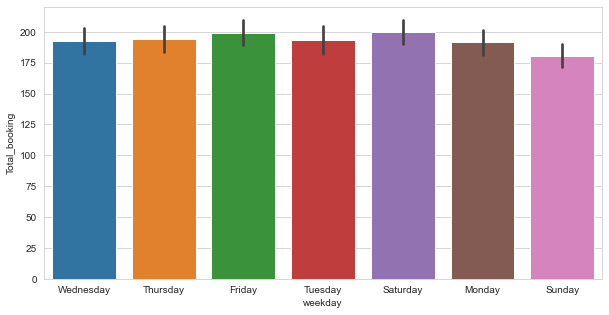

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='Total_booking',data=df)

# Feature engineering

In [ ]:
# applying Labelencoder,get_dummies,Scaling

In [ ]:
lb_encoder=LabelEncoder()
df['season']=lb_encoder.fit_transform(df['season'])
df['weekday']=lb_encoder.fit_transform(df['weekday'])

In [ ]:
lb_encoder=LabelEncoder()
df_test['season']=lb_encoder.fit_transform(df_test['season'])
df_test['weekday']=lb_encoder.fit_transform(df_test['weekday'])

In [ ]:
df=pd.get_dummies(df,columns=['weather'])

In [ ]:
df_test=pd.get_dummies(df_test,columns=['weather'])

In [ ]:
df.head()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,month,hour,weekday,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2012-05-02 19:00:00,2,0,1,22.14,25.760,77,16.9979,504,5,19,6,1,0,0,0
1,2012-09-05 04:00:00,0,0,1,28.70,33.335,79,19.0012,5,9,4,6,1,0,0,0
2,2011-01-13 09:00:00,1,0,1,5.74,6.060,50,22.0028,139,1,9,4,1,0,0,0
3,2011-11-18 16:00:00,3,0,1,13.94,16.665,29,8.9981,209,11,16,0,1,0,0,0
4,2011-09-13 13:00:00,0,0,1,30.34,33.335,51,19.0012,184,9,13,5,1,0,0,0


# Correlation Analysis

In [ ]:
# atemp & temp having strong correlation between them --> so one feature is sufficient in building the model
# temp/atemp has +ive correlation & humidity has -ive correlation with total bookings
# windspeed has less correlation on total bookings --> but some dependency is there --> so, i am retaining it
# working day, holiday,weekday has less impact on bookings --> so we may drop or retain --> both we are checking it --> decide later

<AxesSubplot:>

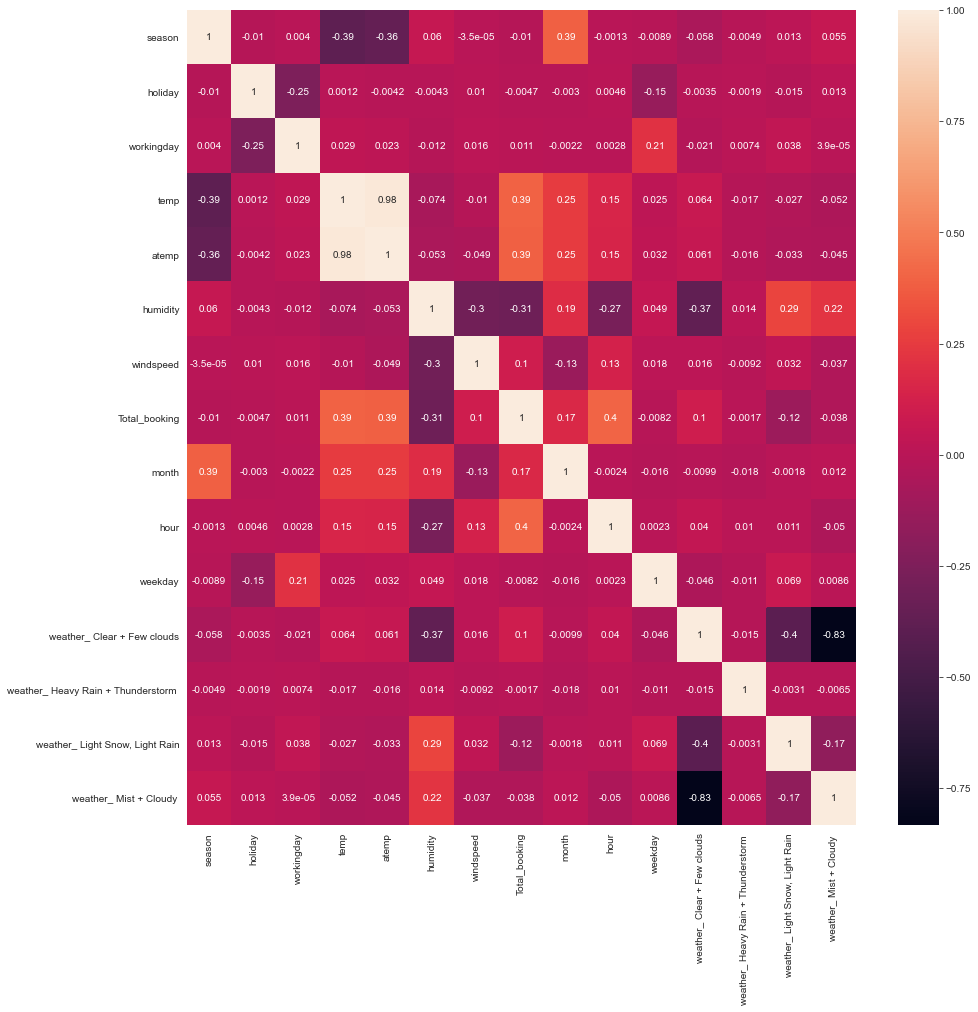

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# checking the models performance without dropping the 'working day, holiday,weekday' features

In [ ]:
# dropping the 'temp' column & retaining the 'atemp' column

In [ ]:
df.drop(columns=['temp'],axis=1,inplace=True)

In [ ]:
df.drop(columns=['datetime'],axis=1,inplace=True)

In [ ]:
df_test.drop(columns=['temp','datetime'],axis=1,inplace=True)

In [ ]:
df.head()

,season,holiday,workingday,atemp,humidity,windspeed,Total_booking,month,hour,weekday,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,25.760,77,16.9979,504,5,19,6,1,0,0,0
1,0,0,1,33.335,79,19.0012,5,9,4,6,1,0,0,0
2,1,0,1,6.060,50,22.0028,139,1,9,4,1,0,0,0
3,3,0,1,16.665,29,8.9981,209,11,16,0,1,0,0,0
4,0,0,1,33.335,51,19.0012,184,9,13,5,1,0,0,0


In [ ]:
# scaling of 'atemp','humidity','windspeed' --> to normalize their weights

In [ ]:
scaling=StandardScaler()
df[['atemp','humidity','windspeed']]=scaling.fit_transform(df[['atemp','humidity','windspeed']])

In [ ]:
df_test[['atemp','humidity','windspeed']]=scaling.fit_transform(df_test[['atemp','humidity','windspeed']])

In [ ]:
# splitting data to train & test

In [ ]:
X=df.drop(columns=['Total_booking'])
y=df['Total_booking']

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

# Model Building

# Different models regression analysis

For regression analysis, following models have been considered:

    1) Linear regression
    
    2) Random Forest
    
    3) Decision Tree
    
    4) SVR

In [ ]:
models=[]
r2score_values=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test) 
    print(f'{name}-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')
    r2score_values.append(round(r2_score(y_test,y_pred),3))

LinearRegression-RMSE value:139.863,R2 score:0.375
Randomforest-RMSE value:64.858,R2 score:0.866
DecisionTree-RMSE value:87.16,R2 score:0.757
SVR-RMSE value:140.842,R2 score:0.366


Text(0, 0.5, 'R2 Score')

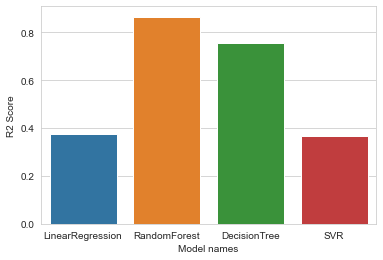

In [ ]:
model_names=['LinearRegression','RandomForest','DecisionTree','SVR']

sns.barplot(x=model_names,y=r2score_values)
plt.xlabel('Model names')
plt.ylabel('R2 Score')

Inference :

Random forest model performs well compared to the remaining models

# Grid search

GridsearchCV --> for finding the best parameters through hyper-parameter tuning

A) Random forest

In [ ]:
model_params_RF = { 'n_estimators':range(20,100,20),
                   'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth':range(3,15)                
               } 
grid_scores_RF=GridSearchCV(estimator=RandomForestRegressor(),param_grid=model_params_RF,verbose=True,cv=5,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_RF.fit(x_train,y_train)  

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   28.7s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(20, 100, 20)},
             return_train_score=True, scoring='r2', verbose=True)

In [ ]:
grid_scores_RF.best_params_

{'max_depth': 14, 'max_features': 'auto', 'n_estimators': 80}

In [ ]:
rf=RandomForestRegressor(max_depth=14, max_features='auto', n_estimators=80,random_state=10)
rf.fit(x_train,y_train)
print(f'RandomForest-RMSE value:{round(mean_squared_error(y_test,rf.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,rf.predict(x_test)),3)}')

RandomForest-RMSE value:66.206,R2 score:0.86


B) Decision tree

In [ ]:
model_params_DT = { 'max_features': ['auto', 'sqrt', 'log2'],
                   'splitter':['best','random'],
                'max_depth':range(3,15)                
               } 
grid_scores_DT=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=model_params_DT,verbose=True,cv=5,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_DT.fit(x_train,y_train) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='r2', verbose=True)

In [ ]:
grid_scores_DT.best_params_

{'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
dt=DecisionTreeRegressor(max_depth=10, max_features='auto', splitter='best',random_state=20)
dt.fit(x_train,y_train)
print(f'DecisionTree-RMSE value:{round(mean_squared_error(y_test,dt.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,dt.predict(x_test)),3)}')

DecisionTree-RMSE value:77.245,R2 score:0.809


C) SVR

In [ ]:
model_params_SVR = {'kernel': ['rbf'], 
                    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                    'C': [1, 10, 100, 1000]
                   }
grid_scores_SVR=GridSearchCV(estimator=SVR(),param_grid=model_params_SVR,verbose=True,cv=5,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_SVR.fit(x_train,y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   59.2s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='r2', verbose=True)

In [ ]:
grid_scores_SVR.best_params_

{'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}

In [ ]:
svr=SVR(C=1000, gamma=0.2, kernel='rbf')
svr.fit(x_train,y_train)
print(f'SVR-RMSE value:{round(mean_squared_error(y_test,svr.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,svr.predict(x_test)),3)}')

SVR-RMSE value:66.388,R2 score:0.859


Text(0, 0.5, 'R2 Score')

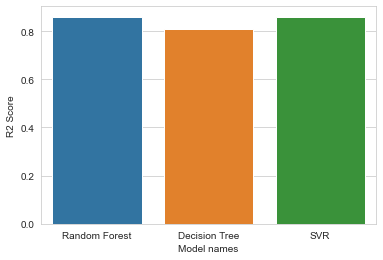

In [ ]:
model_scores=[round(r2_score(y_test,rf.predict(x_test)),3),round(r2_score(y_test,dt.predict(x_test)),3),round(r2_score(y_test,svr.predict(x_test)),3)]
model_names=['Random Forest','Decision Tree','SVR']

sns.barplot(x=model_names,y=model_scores)
plt.xlabel('Model names')
plt.ylabel('R2 Score')

Inference :

Random forest model performs well after applying grid search CV also

# Ensemble model

In [ ]:
models=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

for name,model in models:
    bagging=BaggingRegressor(base_estimator=model,n_estimators=100)
    bagging.fit(x_train,y_train)
    y_pred=bagging.predict(x_test) 
    print(f'{name}-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')
    

LinearRegression-RMSE value:139.872,R2 score:0.375
Randomforest-RMSE value:65.106,R2 score:0.865
DecisionTree-RMSE value:64.929,R2 score:0.865
SVR-RMSE value:140.645,R2 score:0.368


In [ ]:
bagging_RF=BaggingRegressor(base_estimator=RandomForestRegressor(),n_estimators=100)
bagging_RF.fit(x_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100)

Inference:

In bagging --> Random forest as base estimator is performing well compared to other estimators

In [ ]:
models=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

for name,model in models:
    adaboost=AdaBoostRegressor(base_estimator=model,n_estimators=100)
    adaboost.fit(x_train,y_train)
    y_pred=adaboost.predict(x_test) 
    print(f'{name}-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')

LinearRegression-RMSE value:144.027,R2 score:0.337
Randomforest-RMSE value:73.657,R2 score:0.827
DecisionTree-RMSE value:66.52,R2 score:0.859
SVR-RMSE value:133.043,R2 score:0.434


Inference:

In Adaboost --> Random forest as base estimator is performing well compared to other estimators

In [ ]:
gradient=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
gradient.fit(x_train,y_train)
y_pred=gradient.predict(x_test) 
print(f'Gradient boost-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')

Gradient boost-RMSE value:77.409,R2 score:0.809


Final Inference (based on model estimation on 'train.csv' data):

1) Based on regression analysis(without hyper-parameter tuning) --> Random forest model performs well compared to others

2) Grid search CV (with hyper-parameter tuning) --> Random forest model performs well compared to others

3) Ensemble learnings --> Both decision tree & random forest models as base-estimators are performing well

Based on above all models 'bagging with random forest as base estimator' is giving best results compared to others on 'train.csv'. 

# checking the models performance by dropping the 'working day, holiday,weekday' features

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'month', 'hour', 'weekday',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [ ]:
df.drop(columns=['holiday','workingday','weekday'],axis=1,inplace=True)

In [ ]:
df_test.drop(columns=['holiday','workingday','weekday'],axis=1,inplace=True)

In [ ]:
df.head()

,season,atemp,humidity,windspeed,Total_booking,month,hour,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,25.760,77,16.9979,504,5,19,1,0,0,0
1,0,33.335,79,19.0012,5,9,4,1,0,0,0
2,1,6.060,50,22.0028,139,1,9,1,0,0,0
3,3,16.665,29,8.9981,209,11,16,1,0,0,0
4,0,33.335,51,19.0012,184,9,13,1,0,0,0


In [ ]:
# scaling of 'atemp','humidity','windspeed' --> to normalize their weights

In [ ]:
scaling=StandardScaler()
df[['atemp','humidity','windspeed']]=scaling.fit_transform(df[['atemp','humidity','windspeed']])

In [ ]:
df_test[['atemp','humidity','windspeed']]=scaling.fit_transform(df_test[['atemp','humidity','windspeed']])

In [ ]:
# spliting train dataset into --> train & test for validation of results

In [ ]:
X=df.drop(columns=['Total_booking'])
y=df['Total_booking']

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

# Model Building

# Different models regression analysis

For regression analysis, following models have been considered:

    1) Linear regression
    
    2) Random Forest
    
    3) Decision Tree
    
    4) SVR

In [ ]:
models=[]
r2score_values=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test) 
    print(f'{name}-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')
    r2score_values.append(round(r2_score(y_test,y_pred),3))

LinearRegression-RMSE value:139.789,R2 score:0.376
Randomforest-RMSE value:97.164,R2 score:0.698
DecisionTree-RMSE value:131.828,R2 score:0.445
SVR-RMSE value:140.028,R2 score:0.373


Text(0, 0.5, 'R2 Score')

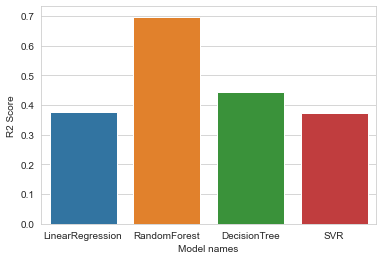

In [ ]:
model_names=['LinearRegression','RandomForest','DecisionTree','SVR']

sns.barplot(x=model_names,y=r2score_values)
plt.xlabel('Model names')
plt.ylabel('R2 Score')

Inference : 


Random forest model performs well compared to the remaining models

# Grid search

GridsearchCV --> for finding the best parameters through hyper-parameter tuning

(A) Random Forest

In [ ]:
model_params_RF = { 'n_estimators':range(20,100,20),
                   'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth':range(3,15)                
               } 
grid_scores_RF=GridSearchCV(estimator=RandomForestRegressor(),param_grid=model_params_RF,verbose=True,cv=5,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_RF.fit(x_train,y_train)  

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   30.7s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(20, 100, 20)},
             return_train_score=True, scoring='r2', verbose=True)

In [ ]:
# these are best parameters for random forest

In [ ]:
grid_scores_RF.best_params_

{'max_depth': 13, 'max_features': 'auto', 'n_estimators': 60}

In [ ]:
# implementing the above parameters to random forest model
# R2 score has improved compared to previous fit of model 

In [ ]:
rf=RandomForestRegressor(max_depth=13, max_features='auto', n_estimators=60,random_state=10)
rf.fit(x_train,y_train)
print(f'RandomForest-RMSE value:{round(mean_squared_error(y_test,rf.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,rf.predict(x_test)),3)}')

RandomForest-RMSE value:96.265,R2 score:0.704


(B) Decision Tree

In [ ]:
model_params_DT = { 'max_features': ['auto', 'sqrt', 'log2'],
                   'splitter':['best','random'],
                'max_depth':range(3,15)                
               } 
grid_scores_DT=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=model_params_DT,verbose=True,cv=5,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_DT.fit(x_train,y_train) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='r2', verbose=True)

In [ ]:
# these are best parameters for decision tree

In [ ]:
grid_scores_DT.best_params_

{'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
# implementing the above parameters to decision tree model
# R2 score has improved compared to previous fit

In [ ]:
dt=DecisionTreeRegressor(max_depth=8, max_features='auto', splitter='best',random_state=20)
dt.fit(x_train,y_train)
print(f'DecisionTree-RMSE value:{round(mean_squared_error(y_test,dt.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,dt.predict(x_test)),3)}')

DecisionTree-RMSE value:103.7,R2 score:0.656


(C) SVR

In [ ]:
model_params_SVR = {'kernel': ['rbf'], 
                    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                    'C': [1, 10, 100, 1000]
                   }
grid_scores_SVR=GridSearchCV(estimator=SVR(),param_grid=model_params_SVR,verbose=True,cv=5,return_train_score = True,scoring = 'r2',n_jobs=-1)
grid_scores_SVR.fit(x_train,y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   47.1s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='r2', verbose=True)

In [ ]:
# these are best parameters for SVR

In [ ]:
grid_scores_SVR.best_params_

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}

In [ ]:
# implementing the above parameters to SVR

In [ ]:
svr=SVR(C=100, gamma=0.2, kernel='rbf')
svr.fit(x_train,y_train)
print(f'SVR-RMSE value:{round(mean_squared_error(y_test,svr.predict(x_test),squared=False),3)},R2 score:{round(r2_score(y_test,svr.predict(x_test)),3)}')

SVR-RMSE value:97.717,R2 score:0.695


(D) Plot of different models performance

In [ ]:
# plotting of different models performance based on R2-Score (after Grid search)
# through grid search perfromance of all models has improved
# random forest model performance better compared to other models

Text(0, 0.5, 'R2 Score')

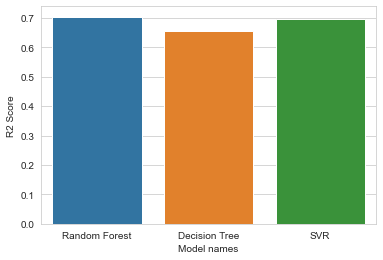

In [ ]:
model_scores=[round(r2_score(y_test,rf.predict(x_test)),3),round(r2_score(y_test,dt.predict(x_test)),3),round(r2_score(y_test,svr.predict(x_test)),3)]
model_names=['Random Forest','Decision Tree','SVR']

sns.barplot(x=model_names,y=model_scores)
plt.xlabel('Model names')
plt.ylabel('R2 Score')

Inference : 

Random forest model performs well after applying grid search CV also

# Ensemble model

In [ ]:
models=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

for name,model in models:
    bagging=BaggingRegressor(base_estimator=model,n_estimators=100)
    bagging.fit(x_train,y_train)
    y_pred=bagging.predict(x_test) 
    print(f'{name}-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')
    

LinearRegression-RMSE value:139.8,R2 score:0.375
Randomforest-RMSE value:94.302,R2 score:0.716
DecisionTree-RMSE value:96.978,R2 score:0.699
SVR-RMSE value:139.906,R2 score:0.375


In [ ]:
bagging_RF=BaggingRegressor(base_estimator=RandomForestRegressor(),n_estimators=100)
bagging_RF.fit(x_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100)

Inference:

In bagging --> Random forest as base estimator is performing well compared to other estimators

In [ ]:
models=[]

models.append(('LinearRegression',LinearRegression()))
models.append(('Randomforest', RandomForestRegressor()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

for name,model in models:
    adaboost=AdaBoostRegressor(base_estimator=model,n_estimators=100)
    adaboost.fit(x_train,y_train)
    y_pred=adaboost.predict(x_test) 
    print(f'{name}-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')

LinearRegression-RMSE value:143.984,R2 score:0.338
Randomforest-RMSE value:96.466,R2 score:0.703
DecisionTree-RMSE value:99.166,R2 score:0.686
SVR-RMSE value:132.225,R2 score:0.441


Inference:

    In Adaboost --> Random forest as base estimator is performing well compared to other estimators

In [ ]:
gradient=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
gradient.fit(x_train,y_train)
y_pred=gradient.predict(x_test) 
print(f'Gradient boost-RMSE value:{round(mean_squared_error(y_test,y_pred,squared=False),3)},R2 score:{round(r2_score(y_test,y_pred),3)}')

Gradient boost-RMSE value:96.925,R2 score:0.7


Final Inference (based on model estimation on 'train.csv' data): 
    
1) Based on regression analysis(without hyper-parameter tuning) --> Random forest model performs well compared to others

2) Grid search CV (with hyper-parameter tuning) --> Random forest model performs well compared to others

3) Ensemble learnings --> Both decision tree & random forest models as base-estimators are performing well

Based on above all models 'bagging with random forest as base estimator' is giving best results compared to others on 'train.csv'. 

# model selection

We have checked the model performance by dropping the 'working day, holiday,weekday' features & without dropping the
'working day, holiday,weekday' features. 

Based on this, without dropping the 'working day, holiday,weekday' features is giving best R2-Score compared to dropping
of 'working day, holiday,weekday' features.

So for 'test.csv' prediction here i am using without dropping the 'working day, holiday,weekday' features model.

we are going to use 'bagging with random forest as base estimator' for predicting the 'Total_booking' in 'test.csv'.

# [B] Testing the trained model on 'test.csv'

In [ ]:
df_test.head()

,season,holiday,workingday,atemp,humidity,windspeed,month,hour,weekday,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,0.160949,-0.764829,2.777205,5,11,4,1,0,0
1,2,0,0,0.432824,0.060053,-0.697425,6,7,2,1,0,0
2,1,0,0,-1.378285,1.916038,1.908340,3,20,3,0,1,0
3,3,0,1,0.613875,1.039601,-1.566290,10,11,4,0,0,1
4,2,0,0,0.885153,-1.022605,1.411964,6,12,2,1,0,0


In [ ]:
# trained dataset after feature engineering has 13 features. But test dataset after feature engineering has 12 features.
# In test data set after feature engineering 'weather_ Heavy Rain + Thunderstorm' is missing which is available in train dataset'.
# So, we are adding column of 'weather_ Heavy Rain + Thunderstorm' with all values as zero in test data set.

In [ ]:
X.shape

(8526, 13)

In [ ]:
X_test=df_test

In [ ]:
X_test.shape

(2178, 12)

In [ ]:
X.head()

,season,holiday,workingday,atemp,humidity,windspeed,month,hour,weekday,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,2,0,1,0.240269,0.789104,0.621430,5,19,6,1,0,0,0
1,0,0,1,1.134729,0.894323,0.888860,9,4,6,1,0,0,0
2,1,0,1,-2.085918,-0.631361,1.289558,1,9,4,1,0,0,0
3,3,0,1,-0.833674,-1.736167,-0.446501,11,16,0,1,0,0,0
4,0,0,1,1.134729,-0.578751,0.888860,9,13,5,1,0,0,0


In [ ]:
X_test['weather_ Heavy Rain + Thunderstorm']=0

In [ ]:
X_test

,season,holiday,workingday,atemp,humidity,windspeed,month,hour,weekday,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,weather_ Heavy Rain + Thunderstorm
0,2,0,1,0.160949,-0.764829,2.777205,5,11,4,1,0,0,0
1,2,0,0,0.432824,0.060053,-0.697425,6,7,2,1,0,0,0
2,1,0,0,-1.378285,1.916038,1.908340,3,20,3,0,1,0,0
3,3,0,1,0.613875,1.039601,-1.566290,10,11,4,0,0,1,0
4,2,0,0,0.885153,-1.022605,1.411964,6,12,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1,0,1,-0.110927,0.008498,1.660568,3,3,4,1,0,0,0
2174,1,0,1,-0.744307,0.936490,-0.697425,1,12,4,0,0,1,0
2175,1,0,1,-0.110927,-0.197723,0.915588,3,22,6,1,0,0,0
2176,2,0,1,-0.291978,1.606707,-0.449653,5,5,4,1,0,0,0


In [ ]:
# predicting the values on 'test dataset'

In [ ]:
Y_prediction_test=bagging_RF.predict(X_test)

In [ ]:
df_prediction=pd.DataFrame(np.round(Y_prediction_test),columns=['prediction'])
df_prediction

,prediction
0,196.0
1,67.0
2,89.0
3,128.0
4,571.0
...,...
2173,4.0
2174,76.0
2175,107.0
2176,25.0


In [ ]:
# sending the values to 'output.csv'

In [ ]:
df_prediction.to_csv('output.csv',index=False)

Conclusion:

In this problem, Cab company wants to predict how many cabs to be required at each time period. So, that they can be prepared for customer demand & surge. Due to this their reputation, customer satisfaction and revenue will improve. For predicting the total bookings on 'test.csv', they are having the existing data in the form of ‘train.csv’.

For finding the solution, I have approached following steps for predicting the ‘total bookings’ on ‘test.csv 

1)	Performed EDA analysis on train data for knowing the better insights about the data.

2)	Data cleaning, outlier analysis and feature engineering performed on train dataset. So, that data can be readily available for model building.

3)	Trained the model using – Regression analysis, Hyper-parameter tuning & finding of best parameters using Grid Search CV, and Ensemble learning.

4)	Based on the above analysis, ‘Bagging with RandomForest as base estimator’ is giving best results.

5)	So, same has been used for predicting the ‘total booking’ on ‘test.csv’ & predicted values are stored in ‘output.csv’.
